# Student profiling based on moodle log data
In this project we are analysing students' grades from a Python programming introduction course. The cleaned data contains the grades of 315 students throughout the entire semester. Our goals are: <br>
1) to identify 'struggling students' based on their early activities; <br>
2) to predict students' final grades.

The project is conducted in the University of Tartu based on the grades of the University of Tartu students. 

During the preliminary data cleaning we identified students who didn't participate in the course (missing scores from most assignments) and got a final score of below 5. These students probably dropped out or gave up. Therefore we removed them from the data.

We define a struggling student as someone who got less than 50% from the first 6  assignments(quizzes and homeworks), but they took part in most of those assignments. Since there was a test during week 6, we took the quiz and homework scores from week 7. We consider any grade above D to be a good final grade.

For our second goal we decided to see how accurately it is possible to predict final grades based on total scores of moodle quizzes and homeworks. We chose the features because all the other activities in the course are testing the knowledge the student should learn through solving the quizzes and homeworks.

Grading scale: A [90-110], B [80-90), C [70-80), D [60-70), E [50-60), F [0-50)

Importing the modules and data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("grades.csv", sep = ';')
data.head()

,ID,Test:1. nadala test (Punktid),Test:2. nadala test (Punktid),Test:3. nadala test (Punktid),Test:4. nadala test (Punktid),Test:5. nadala test (Punktid),Test:6. nadala test (Punktid),Test:7. nadala test (Punktid),Test:8. nadala test (Punktid),Test:9. nadala test (Punktid),Test:10. nadala test (Punktid),Test:11. nadala test (Punktid),Test:12. nadala test (Punktid),Test:13. nadala test (Punktid),Test:14. nadala test (Punktid),Test:15. nadala test (Punktid),Test:16. nadala test (Punktid),Videoloengud kokku (Punktid),VPL harjutus:1. nadala kodutoo (Punktid),VPL harjutus:Praktikumitoo esitamine (Punktid),VPL harjutus:2. nadala kodutoo (Punktid),VPL harjutus:Praktikumitoo esitamine (Punktid).1,VPL harjutus:3. nadala kodutoo (Punktid),VPL harjutus:Praktikumitoo esitamine (Punktid).2,VPL harjutus:4. nadala kodutoo (Punktid),VPL harjutus:Praktikumitoo esitamine (Punktid).3,VPL harjutus:5. nadala kodutoo (Punktid),VPL harjutus:Praktikumitoo esitamine (Punktid).4,VPL harjutus:7. nadala kodutoo (Punktid),VPL harjutus:Praktikumitoo esitamine (Punktid).5,VPL harjutus:8. nadala kodutoo (Punktid),VPL harjutus:Praktikumitoo esitamine (Punktid).6,VPL harjutus:9. nadala kodutoo (Punktid),VPL harjutus:Praktikumitoo esitamine (Punktid).7,VPL harjutus:10. nadala kodutoo (Punktid),VPL harjutus:Praktikumitoo esitamine (Punktid).8,VPL harjutus:11. nadala kodutoo (Punktid),VPL harjutus:Praktikumitoo esitamine (Punktid).9,VPL harjutus:13. nadala kodutoo (Punktid),VPL harjutus:Praktikumitoo esitamine (Punktid).10,...,VPL harjutus:1. KT 5.01 lisajareltoo programmide esitamine (Punktid),Test:1. KT 25.01 lisajareltoo arvestuslik osa (Punktid),VPL harjutus:1. KT 25.01 lisajareltoo programmide esitamine (Punktid),Test:2. kontrolltoo arvestuslik osa (Punktid),VPL harjutus:2. kontrolltoo programmide esitamine (Punktid),Test:2. KT jareltoo arvestuslik osa (Punktid),VPL harjutus:2. KT jareltoo programmide esitamine (Punktid),Test:2. KT 6.01 lisajareltoo arvestuslik osa (Punktid),VPL harjutus:2. KT 6.01 lisajareltoo programmide esitamine (Punktid),Test:2. KT 26.01 lisajareltoo arvestuslik osa (Punktid),VPL harjutus:2. KT 26.01 lisajareltoo programmide esitamine (Punktid),Kontrolltood kokku (Punktid),Eksamile paas (Punktid),Test:8.01 eksami arvestuslik osa (Punktid),Test:8.01 eksami punktilise osa 1. ulesanne (Punktid),VPL harjutus:8.01 eksami punktilise osa 2. ja 3. ulesande esitamine (Punktid),Test:14.01 eksami arvestuslik osa (Punktid),Test:14.01 eksami punktilise osa 1. ulesanne (Punktid),VPL harjutus:14.01 eksami punktilise osa 2. ja 3. ulesande esitamine (Punktid),Test:27.01 eksami arvestuslik osa (Punktid),Test:27.01 eksami punktilise osa 1. ulesanne (Punktid),VPL harjutus:27.01 eksami punktilise osa 2. ja 3. ulesande esitamine (Punktid),Eksam kokku (Punktid),VPL harjutus:1. lisaulesanne 0 Muster (Punktid),VPL harjutus:2. lisaulesanne 0 Tekstispiraal (Punktid),VPL harjutus:3. lisaulesanne 0 Salasona (Punktid),VPL harjutus:4. lisaulesanne 0 Pakkimine (Punktid),VPL harjutus:5. lisaulesanne 0 Ristmik (Punktid),VPL harjutus:6. lisaulesanne 0 Laburint (Punktid),8. lisaulesanne 0 Loppkusitlus (Punktid),Praktikumide lisapunktid (Punktid),Projektikonkursi punktid (Punktid),Lisapunktid kokku (Punktid),VPL harjutus:Pokkerikate tuvastamise automaatkontroll (Punktid),Test:Kontrolltoo harjutustest (Punktid),Test:Kontrolltoo harjutustest (Punktid).1,Test:Naidiseksami arvestuslik osa (Punktid),Test:Naidiseksami punktilise osa 1. ulesanne (Punktid),Kogutulemus (Punktid),Hinne (Punktid)
0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,7.00,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,39.9,1.0,0.0,0.0,0.0,1.0,10.0,20.0,0.0,0.0,0.0,30.0,2.0,2.0,2.0,2.0,2.0,1.8,1.0,1.0,0.0,10.0,0.0,8.0,9.00,4.0,9.6,109.40,100.00
1,2.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5,0.5,0.5,0.4,0.5,0.4,0.4,7.00,0.5,0.5,0.5,0.5,0.0,0.5,0.1,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0

Check if any columns contain only NaN values.

In [ ]:
counter = 0
for column in data:
  if data[column].isnull().all():
    counter +=1
    print(data[column].head())
print(counter)

0


Selecting data for the first goal.

In [ ]:
data_fg = data[['ID','Test:1. nadala test (Punktid)', 'Test:2. nadala test (Punktid)', 'Test:3. nadala test (Punktid)', 'Test:4. nadala test (Punktid)', 'Test:5. nadala test (Punktid)', 'Test:7. nadala test (Punktid)', 
               'VPL harjutus:1. nadala kodutoo (Punktid)', 'VPL harjutus:2. nadala kodutoo (Punktid)', 'VPL harjutus:3. nadala kodutoo (Punktid)', 'VPL harjutus:4. nadala kodutoo (Punktid)',
               'VPL harjutus:5. nadala kodutoo (Punktid)','VPL harjutus:7. nadala kodutoo (Punktid)', 'Kogutulemus (Punktid)', 'Hinne (Punktid)']]
data_fg.head()

,ID,Test:1. nadala test (Punktid),Test:2. nadala test (Punktid),Test:3. nadala test (Punktid),Test:4. nadala test (Punktid),Test:5. nadala test (Punktid),Test:7. nadala test (Punktid),VPL harjutus:1. nadala kodutoo (Punktid),VPL harjutus:2. nadala kodutoo (Punktid),VPL harjutus:3. nadala kodutoo (Punktid),VPL harjutus:4. nadala kodutoo (Punktid),VPL harjutus:5. nadala kodutoo (Punktid),VPL harjutus:7. nadala kodutoo (Punktid),Kogutulemus (Punktid),Hinne (Punktid)
0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,109.40,100.00
1,2.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.1,0.5,0.5,97.60,97.60
2,3.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,95.68,95.68
3,4.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.3,0.5,0.5,73.13,73.13
4,5.0,0.5,0.4,0.4,0.2,0.3,0.5,0.0,0.3,0.5,0.3,0.5,0.0,42.23,0.10


Calculate the average for the quizzes and homeworks, add the corresponding columns to the dataframe. 

In [ ]:
data_fg['testide keskmine'] = data_fg[['Test:1. nadala test (Punktid)', 'Test:2. nadala test (Punktid)', 'Test:3. nadala test (Punktid)', 'Test:4. nadala test (Punktid)', 'Test:5. nadala test (Punktid)', 'Test:7. nadala test (Punktid)']].mean(axis=1)
data_fg['kodutoode keskmine'] = data_fg[['VPL harjutus:1. nadala kodutoo (Punktid)', 'VPL harjutus:2. nadala kodutoo (Punktid)', 'VPL harjutus:3. nadala kodutoo (Punktid)', 'VPL harjutus:4. nadala kodutoo (Punktid)',
               'VPL harjutus:5. nadala kodutoo (Punktid)','VPL harjutus:7. nadala kodutoo (Punktid)']].mean(axis=1)
data_fg['testide ja kodutoode keskmine'] = data_fg[['testide keskmine', 'kodutoode keskmine']].mean(axis=1)

data_fg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,ID,Test:1. nadala test (Punktid),Test:2. nadala test (Punktid),Test:3. nadala test (Punktid),Test:4. nadala test (Punktid),Test:5. nadala test (Punktid),Test:7. nadala test (Punktid),VPL harjutus:1. nadala kodutoo (Punktid),VPL harjutus:2. nadala kodutoo (Punktid),VPL harjutus:3. nadala kodutoo (Punktid),VPL harjutus:4. nadala kodutoo (Punktid),VPL harjutus:5. nadala kodutoo (Punktid),VPL harjutus:7. nadala kodutoo (Punktid),Kogutulemus (Punktid),Hinne (Punktid),testide keskmine,kodutoode keskmine,testide ja kodutoode keskmine
0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,109.40,100.00,0.500000,0.500000,0.500000
1,2.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.1,0.5,0.5,97.60,97.60,0.500000,0.350000,0.425000
2,3.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,95.68,95.68,0.500000,0.500000,0.500000
3,4.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.3,0.5,0.5,73.13,73.13,0.416667,0.466667,0.441667
4,5.0,0.5,0.4,0.4,0.2,0.3,0.5,0.0,0.3,0.5,0.3,0.5,0.0,42.23,0.10,0.383333,0.266667,0.325000


Create a plot for final grades to get an initial overview. x-axis is students, y-axis is final scores ('Kogutulemus (Punktid)'). 

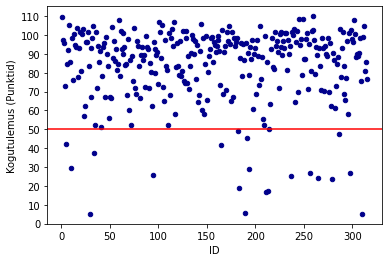

In [ ]:
import matplotlib.ticker as plticker
loc = plticker.MultipleLocator(base=10.0)

ax1 = data_fg.plot.scatter(x = 'ID', y = 'Kogutulemus (Punktid)', c='DarkBlue')
ax1.yaxis.set_major_locator(loc)

ax1.axhline(y=50, color='r')

Based on this plot, most of the students passed with a positive grade.

Create a plot: x-axis is averages of quiz scores, y-axis is final grades. The red line denotes the border between grades C and D.

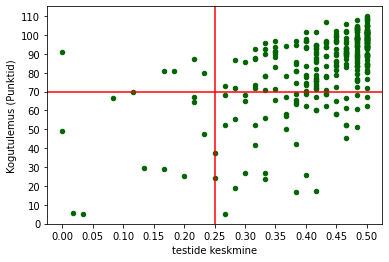

In [ ]:
loc2 = plticker.MultipleLocator(base=0.05)

ax2 = data_fg.plot.scatter(x = 'testide keskmine', y='Kogutulemus (Punktid)', c='DarkGreen')
ax2.yaxis.set_major_locator(loc)
ax2.xaxis.set_major_locator(loc2)
ax2.axhline(y=70, color='r')
ax2.axvline(x=0.25, color= 'r')

Create a plot: x-axis is averages of homework scores, y-axis is final grades.

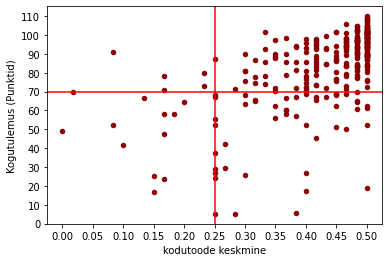

In [ ]:
ax3 = data_fg.plot.scatter(x = 'kodutoode keskmine', y='Kogutulemus (Punktid)', c='DarkRed')
ax3.yaxis.set_major_locator(loc)
ax3.xaxis.set_major_locator(loc2)
ax3.axhline(y=70, color='r')
ax3.axvline(x=0.25, color= 'r')

Create a plot: x-axis is averages of quiz and homework scores, y-axis is final grades.

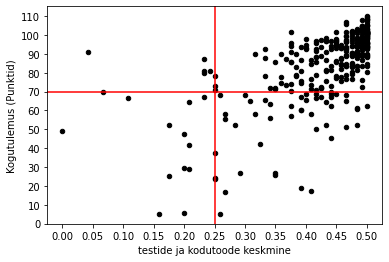

In [ ]:
ax4 = data_fg.plot.scatter(x = 'testide ja kodutoode keskmine', y='Kogutulemus (Punktid)', c='Black')
ax4.yaxis.set_major_locator(loc)
ax4.xaxis.set_major_locator(loc2)
ax4.axhline(y=70, color='r')
ax4.axvline(x=0.25, color= 'r')

# Analysis of results for the first goal

We created the plots to see if there is any correlation between initial averages and final grades. Looking at the plots, we can see that based on early activities there is a low number of struggling students. We can also see that students with higher initial averages of homeworks and quizzes tend to get higher final scores. We can claim the same for low initial averages, since most of those students also got worse final scores. It must be noted that there are a few exceptions (students who got worse initial averages but high final scores).<br>
However, there is also a notable amount of students who got higher initial averages but finished with a final score of less than 70. Based on our analysis, we cannot identify all students who are actually struggling based on initial averages alone.

# Second goal: Predicting final grades
Selecting data for the second goal: sum of all quiz scores, sum of all homework scores (these include scores for submitted practice lab exercises), final grades. 

In [ ]:
data_sg = data[['ID', 'Videoloengud kokku (Punktid)', 'Kodutood kokku (Punktid)', 'Hinne (Punktid)']]
data_sg.head()

,ID,Videoloengud kokku (Punktid),Kodutood kokku (Punktid),Hinne (Punktid)
0,1.0,7.00,12.5,100.00
1,2.0,7.00,11.2,97.60
2,3.0,6.98,10.8,95.68
3,4.0,6.13,11.4,73.13
4,5.0,5.53,8.7,0.10


Convert numerical grades into categories: A,B,C,D,E,F.

In [ ]:
for i in data_sg['Hinne (Punktid)']:
  if (i < 50):
    data_sg['Hinne (Punktid)']  = data_sg['Hinne (Punktid)'].replace(i, 'F')
  elif i < 60:
    data_sg['Hinne (Punktid)']  = data_sg['Hinne (Punktid)'].replace(i, 'E')
  elif (60 < i < 70):
    data_sg['Hinne (Punktid)']  = data_sg['Hinne (Punktid)'].replace(i, 'D')
  elif (70 < i < 80):
    data_sg['Hinne (Punktid)']  = data_sg['Hinne (Punktid)'].replace(i, 'C')
  elif (80 < i < 90):
    data_sg['Hinne (Punktid)']  = data_sg['Hinne (Punktid)'].replace(i, 'B')
  else:
    data_sg['Hinne (Punktid)']  = data_sg['Hinne (Punktid)'].replace(i, 'A')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
data_sg=data_sg.rename(columns={'Hinne (Punktid)': 'Hinne'})
data_sg.head()

,ID,Videoloengud kokku (Punktid),Kodutood kokku (Punktid),Hinne
0,1.0,7.00,12.5,A
1,2.0,7.00,11.2,A
2,3.0,6.98,10.8,A
3,4.0,6.13,11.4,C
4,5.0,5.53,8.7,F


Split the data into train set (80%) and test set (20%).


In [ ]:
from sklearn.model_selection import train_test_split

features = data_sg[['Videoloengud kokku (Punktid)', 'Kodutood kokku (Punktid)']]
final_grades = data_sg[['Hinne']]

X_train, X_test, y_train, y_test = train_test_split(features, final_grades, test_size=0.2, random_state=0)


Change grades in train set into binary columns using one-hot encoding.

In [ ]:
y_train_dummies = pd.get_dummies(y_train, columns=['Hinne'])
y_train_dummies.head()

,Hinne_A,Hinne_B,Hinne_C,Hinne_D,Hinne_E,Hinne_F
64,1,0,0,0,0,0
34,0,0,0,0,1,0
210,0,0,0,0,0,1
266,0,1,0,0,0,0
81,0,1,0,0,0,0


Change grades in test set into binary columns for measuring the model accuracy afterwards.

In [ ]:
y_test_dummies = pd.get_dummies(y_test, columns=['Hinne'])
y_test_dummies.head()

,Hinne_A,Hinne_B,Hinne_C,Hinne_D,Hinne_E,Hinne_F
65,0,1,0,0,0,0
314,0,0,1,0,0,0
150,0,1,0,0,0,0
158,1,0,0,0,0,0
108,0,1,0,0,0,0


For our model, we are going to use random forest classifier. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(X_train, y_train_dummies)

Predict the results for the test data.

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test_dummies, y_pred)
print(acc)

0.4444444444444444


Create plots for grade distributions of results from the model and real results from the test set. For that, we reverse the one-hot encoding for the model.

In [ ]:
pred_df = pd.DataFrame(y_pred, columns= ['Hinne_A','Hinne_B', 'Hinne_C', 'Hinne_D', 'Hinne_E', 'Hinne_F'])

def get_grade(row):
  for c in pred_df.columns:
    if row[c]==1:
      return c
pred_df['Hinne']=pred_df.apply(get_grade, axis=1)

pred_df.head(50)
#pred_df.plot(x=[''], y=[''])

,Hinne_A,Hinne_B,Hinne_C,Hinne_D,Hinne_E,Hinne_F,Hinne
0,1,0,0,0,0,0,Hinne_A
1,1,0,0,0,0,0,Hinne_A
2,0,0,0,0,0,0,None
3,1,0,0,0,0,0,Hinne_A
4,1,0,0,0,0,0,Hinne_A
5,0,0,0,0,0,0,None
6,1,0,0,0,0,0,Hinne_A
7,0,0,0,0,0,0,None
8,1,0,0,0,0,0,Hinne_A
9,1,0,0,0,0,0,Hinne_A


For a better overview we replace the None value with 'No prediction'.

In [ ]:
pred_df.loc[pred_df['Hinne'].isnull(), 'Hinne']='No prediction'


pred_df.head()

,Hinne_A,Hinne_B,Hinne_C,Hinne_D,Hinne_E,Hinne_F,Hinne
0,1,0,0,0,0,0,Hinne_A
1,1,0,0,0,0,0,Hinne_A
2,0,0,0,0,0,0,No prediction
3,1,0,0,0,0,0,Hinne_A
4,1,0,0,0,0,0,Hinne_A


Create the bar plot for test set grades.

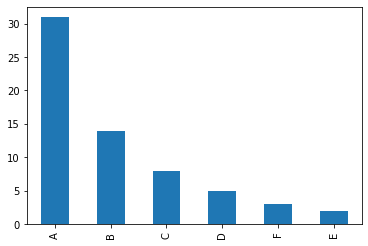

In [ ]:
#order= ['A', 'B', 'C', 'D', 'E', 'F']
#y_test.pivot(columns=['Hinne']).loc[order].plot(kind='bar')
counts_test = y_test['Hinne'].value_counts()
counts_test.plot(kind='bar')

Create the bar plot for model set grades.

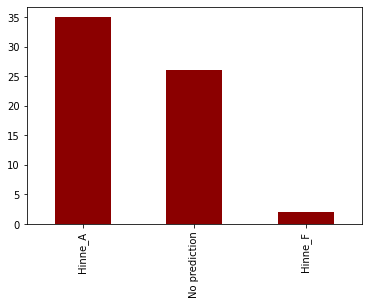

In [ ]:
counts_model = pred_df['Hinne'].value_counts()
counts_model.plot(kind='bar', color='darkred')

#Analysis for the random forest classifier model

Accuracy score for the model is 0.44, which is not very high. From the plots for the test set grades and predicted grades, we can see that the model predicted only 'A's and 'F's, but no other values. There was a large amount of None values, where the model didn't predict any grade, this is the 'No prediction' column. We are not sure what the cause for this is, but possibly the high amount of 'A' values in the training set made the model biased.

#Cross-validation

Next, we will use cross-validation to estimate the skill of our model. We split the training data into 5 sets and print out the accuracy scores, plus the average accuracy score.

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
print(kf)

accs_val = []

# Should add here also loops for different parameters.
for train_index, val_index in kf.split(X_train):
    #print("TRAIN:", train_index, "TEST:", val_index)
    X_trainCV, X_valCV = X_train.iloc[train_index], X_train.iloc[val_index]
    y_trainCV, y_valCV = y_train_dummies.iloc[train_index], y_train_dummies.iloc[val_index]
    
    #y_trainCV_dummies = pd.get_dummies(y_trainCV, columns=['Hinne'])
    #y_trainCV_dummies.head()
    #y_valCV_dummies = pd.get_dummies(y_valCV, columns=['Hinne'])
    rf.fit(X_trainCV, y_trainCV)
    acc = accuracy_score(y_valCV, rf.predict(X_valCV))
    accs_val.append(acc)


print(accs_val) 
np.mean(accs_val)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.43137254901960786, 0.37254901960784315, 0.44, 0.52, 0.44]


0.4407843137254902

Average accuracy score for the model based on cross-validation is 0.44. Based on this, our model's accuracy seems to be correct.

##Analysis for the second goal

Homework and quiz total scores should show how well the student has acquired the theoretical knowledge, which in theory should let one predict the final grades. However, our results show that predicting final grades based on only homework and quiz scores is not very accurate, at least according to our data. One reason might be that the final grade is a sum of homework scores, quiz scores, 2 big test scores, project score and the final exam score. The homework and quiz scores make up to 20% of the final grade, therefore they might not affect the final grade enough to be a good base for accurate predictions.